<a href="https://colab.research.google.com/github/diegogr98/Diego-Gutierrez-Astronomy/blob/main/Tarea1_DiegoGutierrez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p>
<h1><b><center></center></b></h1>
<center><img src="https://drive.google.com/uc?id=1UJc1ci41G6ahJ7ProKvunUOIBcTXZ6ZG" align="center" width="550"></center>
</p>
<h1><b><center>Mecánica Celeste</center></b></h1>
<h2><b><center>Prof. Jorge I. Zuluaga</center></b></h1>
<h2><b><center>Tarea 1</center></b><h2>
<h3><b><center>Sistemas Jerárquicos de N-cuerpos</center></b><h3>
<h5><center><b>Asignada</b>: 1 de Octubre de 2024</center><h5>
<h5><center><b>Entrega</b>: 29 de Octubre de 2024</center><h5>
</p>

<hr/>
<b>Nombre</b>:Diego Alejandro Gutierrez Rodriguez
<br/>
<b>Cédula</b>:1017262792
<br/>
<b>Última actualización</b>:28/10/2024
<hr/>

## Enunciado

**Objetivo**: El objetivo de esta tarea es poner en práctica la teoría que vimos del problema de N-cuerpos para un sistema astrofísico real y adicionalmente someter a prueba la idea de que es posible describir un sistema de N-cuerpos usando un conjunto de de sistemas de 2 cuerpos, o lo que llamamos en clase un *sistema jerárquico de N cuerpos*.

**Procedimiento**:

El sistema que simularemos es el de un sistema binario formado por dos estrellas "s" y "e".  Alrededor de la estrella "e" gira un planeta "p", a cuyo alrededor, a su vez, gira una luna "L".  Los datos de los cuerpos, dados en unidades canónicas, en las que $U_M = 80$ M$_{\rm Jup}$, $U_L = 0.01$ au, son:

- Masas: s = 1, e = 0.5, L = 0.001, p = 0.01.

- Condiciones iniciales: a continuación se proveen datos del vector y velocidad relativa para cada subsistema:

   - Sistema p-L: $\vec r :(0.03,0,0), \vec v : (0,0.4,0.1)$

   - Sistema e-pL (baricentro de p y L): $\vec r :(0,0.4,0), \vec v : (0.9,0,0.2)$
     
  - Sistema s-epL (baricentro e y pL): $\vec r :(2,3,0), \vec v : (-0.2,0.7,0)$


Una vez definidas las condiciones iniciales:

1. Dibujar el árbol del sistema jerárquico como lo hicimos en clase, indicando claramente el nombre de las variables que requiere para la construcción del sistema (vectores relativos, posiciones del centro de masa, etc.). A partir de este árbol y suponiendo que el centro de masa de todo el sistema está en reposo en el origen, calcular las posiciones y velocidades iniciales de las 4 partículas del sistema.

2. Usando la rutina `ncuerpos_solucion` de `pymcel` calcule las posiciones y velocidades de cada partícula como función del tiempo con respecto al centro de masa. Para ello integre las ecuaciones de movimiento por 70 unidades de tiempo canónico. Dibuje la trayectoria de todas las partículas respecto al centro de masa. También dibuje por separado, la trayectoria relativa de el planeta respecto a la estrella e (suponiendo que está estrella está quieta) y la luna respecto al planeta p.  

3. Calcule el valor de todas las 10 cuadraturas del sistema como función del tiempo y verifique que son efectivamente constantes. Para entender la implicación que tienen las cuadraturas, vamos a tomar la energía, por ejemplo, como función del tiempo. Haga una gráfica que tenga la rapidez de cada partícula y su distancia al centro de masa, como función del tiempo (son 8 curvas). En el mismo gráfico muestre el valor de la energía total.

4. Muestre que el sistema esta virializado.

5. Vamos ahora a estudiar el sistema de N cuerpos como pares de sistemas de 2 cuerpos. Para ello use las condiciones iniciales relativas dadas al principio y la rutina `doscuerpos_solucion` para encontrar la evolución del vector y la velocidad relativa por 70 unidades de tiempo canónico. Use el arbol en 1 para calcular a partir de la evolución de los vectores relativos, la posiciones de cada una de las 4 partículas en el tiempo. Compare lo obtenido con este procedimiento aproximado con aquel obtenido en el punto 2.

6. Calcule nuevamente el valor de las 10 cuadraturas usando la solución aproximada en 5. ¿Qué observa?. Verifique si el sistema, bajo la aproximación jerarquica, esta virializado también.

**Resultados esperados**:

- Este notebook con el procedimiento debidamente comentado.

- Gráficos mínimos:
  - Gráficos solicitados en cada punto.

- Datos mínimos:
  - Números solicitados en cada punto.

- Gráficos opcionales:
  - Animación mostrando el movimiento de una de las partículas, predicho con la aproximación jerarquica y con la integración precisa.

- En caso de utilizar ayudas como `ChatGPT` o códigos de `Stack Over Flow` debe citar debidamente la fuente, pero también entender a cabalidad el código, el profesor puede pedir justificación.

## Solución

##1.Arbol jerárquico y vectores $\vec{r_{\text{i}}}$ y $\vec{v_{\text{i}}}$   absolutos de cada uno de los cuerpos celestes.



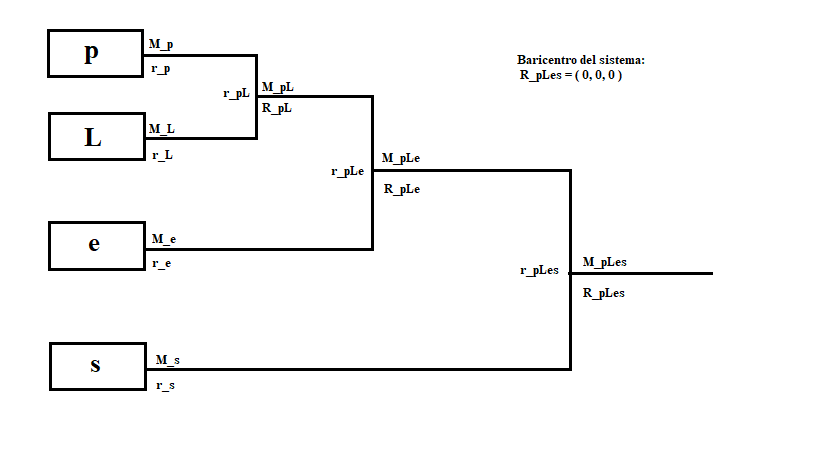

In [ ]:
#Lo primero es instalar pymcel
!pip install -Uq pymcel

In [ ]:
#importamos las librerias que se usaran
import pymcel as pc
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#difinimos las unidades canónicas
UM = 80*pc.constantes.M_jup
UL = 0.01*pc.constantes.au
G = pc.constantes.G

UT = np.sqrt(UL**3//(G*UM))

#unidades derivadas
UV = UL/UT
UA = UM/UT**2
UE = UM*UV**2

In [ ]:
#Definiendo las masas en unidades canónicas
M_L = 0.001
M_p = 0.01
M_e = 0.5
M_s = 1

M_pL = M_p + M_L
M_epL = M_e + M_pL
M_epLs = M_s + M_epL

In [ ]:
#Definimos las posiciones y vectores relativos
r_pL = np.array([0.03, 0, 0])
v_pL = np.array([0, 0.4 ,0.1])

r_epL = np.array([0, 0.4, 0])
v_epL = np.array([0.9, 0, 0.2])

r_epLs = np.array([2, 3, 0])
v_epLs = np.array([-0.2, 0.7, 0])

<h4>Con ayuda de las ecuaciones definidas para la transformacion de coordenadas de Jacobi a cartesianas :

<h3><center>
  \begin{array}{cc}
    \vec{r_1} = \vec{R_{\text{cm}}} + \left( \frac{m_2}{m_1 + m_2} \right) \vec{r} & \quad
    \vec{v_1} = \vec{V_{\text{cm}}} + \left( \frac{m_2}{m_1 + m_2} \right) \vec{v}
  \end{array}
</center></h3>

<h3><center>
  \begin{array}{cc}
    \vec{r_2} = \vec{R_{\text{cm}}} - \left( \frac{m_1}{m_1 + m_2} \right) \vec{r} & \quad
    \vec{v_2} = \vec{V_{\text{cm}}} - \left( \frac{m_1}{m_1 + m_2} \right) \vec{v}
  \end{array}
</center></h3>

<h4>Se pueden hallar cada uno de los vectores absolutos, para ello es necesario tratar al sistema por pares  reemplazando primeramente: $\vec{R_{\text{cm}}}=(0,0,0)$ ;   $\vec{r} = \vec{r_{\text{epLs}}}$ ; $\vec{r_1} = \vec{r_s}$ ; $\vec{r_2} = \vec{R_{\text{epL}}}$ que corresponde al sistema s-epL con el baricentro como origen y a partir del par formado por ambos se pueden hallar las coordenadas absolutas de cada cuerpo celeste siguiendo el mismo tratamiento.

In [ ]:
#Escogiendo el baricentro como origen del sistema de coordenadas
R_cm = np.array([0,0,0])
V_cm = np.array([0,0,0])

#Hallando la posición absoluta de de s y el baricentro del sistema epL
r_s0 = R_cm + (M_epL/(M_epLs))*r_epLs
v_s0 = V_cm + (M_epL/(M_epLs))*v_epLs

R_epL = R_cm - (M_s/(M_epLs))*r_epLs
V_epL = V_cm - (M_s/(M_epLs))*v_epLs

#análogamente para el sistema pL y la estrella e
r_e0 = R_epL + (M_pL/(M_epL))*r_epL
v_e0 = V_epL + (M_pL/(M_epL))*v_epL

R_pL = R_epL - (M_e/(M_epL))*r_epL
V_pL = V_epL - (M_e/(M_epL))*v_epL

#por ultimo para el planeta p y su luna L
r_p0 = R_pL + (M_L/(M_pL))*r_pL
v_p0 = V_pL + (M_L/(M_pL))*v_pL

r_L0 = R_pL - (M_p/(M_pL))*r_pL
v_L0 = V_pL - (M_p/(M_pL))*v_pL

In [ ]:
print("El valor hallado para cada uno de los cuerpos es:\n")

#imprimimos los vectores absolutos hallados
print(f"r_e  = {r_e0}\n"
      f"v_e  = {v_e0}\n"
      f"-----------------\n"
      f"r_s  = {r_s0}\n"
      f"v_s  = {v_s0}\n"
      f"-----------------\n"
      f"r_p  = {r_p0}\n"
      f"v_p  = {v_p0}\n"
      f"-----------------\n"
      f"r_L  = {r_L0}\n"
      f"v_L  = {v_L0}\n")

El valor hallado para cada uno de los cuerpos es:

r_e  = [-1.32362674 -1.97682954  0.        ]
v_e  = [ 0.15173645 -0.46326936  0.00430528]
-----------------
r_s  = [0.67637326 1.01455989 0.        ]
v_s  = [-0.06763733  0.23673064  0.        ]
-----------------
r_p  = [-1.32089946 -2.37682954  0.        ]
v_p  = [-0.74826355 -0.42690572 -0.18660381]
-----------------
r_L  = [-1.35089946 -2.37682954  0.        ]
v_L  = [-0.74826355 -0.82690572 -0.28660381]



##2. Gráficas de los sistemas con la rutina  `ncuerpos_solucion` de `pymcel`.


Graficando los 4 cuerpos respecto al centro de masa del sistema.

In [ ]:
#creando un diccionario con el sistema
sistema = [
    dict(m = M_e, r = r_e0, v = v_e0),
    dict(m = M_s, r = r_s0, v = v_s0),
    dict(m = M_p, r = r_p0, v = v_p0),
    dict(m = M_L, r = r_L0, v = v_L0)
]

ts = np.linspace(0, 70, 1000)#tiempo en unidades canónicas
rs, vs, rps, vps, cuadraturas = pc.ncuerpos_solucion(sistema,ts)

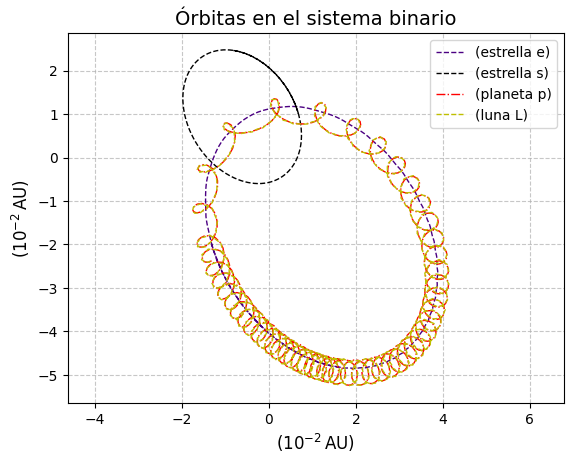

In [ ]:
# Graficando las orbitas de los 4 cuerpos
plt.plot(rs[0, :, 0], rs[0, :, 1],
         label ='(estrella e)', color ='indigo',
         linestyle ='--', linewidth = 1)

plt.plot(rs[1, :, 0], rs[1, :, 1],
         label ='(estrella s)', color ='k',
         linestyle ='--', linewidth = 1)

plt.plot(rs[2, :, 0], rs[2, :, 1],
         label ='(planeta p)', color ='r',
         linestyle ='-.', linewidth = 1)

plt.plot(rs[3, :, 0], rs[3, :, 1],
         label ='(luna L)', color ='y',
         linestyle ='--',  linewidth = 1)

plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel(r'$(10^{-2} \, \mathrm{AU})$',
           fontsize=12)
plt.ylabel(r'$(10^{-2} \, \mathrm{AU})$',
           fontsize=12)

plt.title('Órbitas en el sistema binario', fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.show()

Graficando el movimiento del planeta p respecto a la estrella e

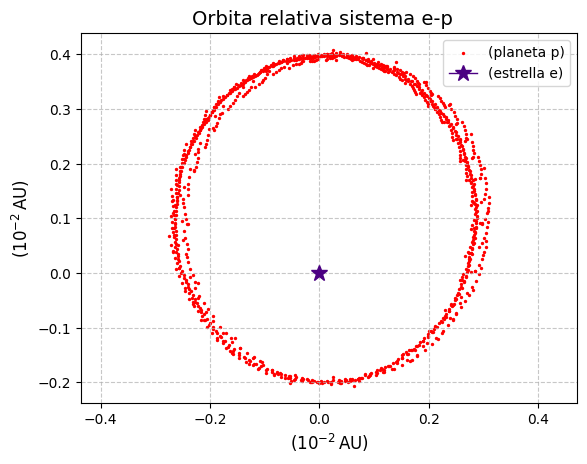

In [ ]:
#definiendo las posiciones relativas del planeta
xs_p = rs[0,:,0] - rs[2,:,0]
ys_p = rs[0,:,1] - rs[2,:,1]

#graficando el sistema
plt.scatter(xs_p, ys_p, marker='o',
            s = 2, label='(planeta p)',
            color='r')

plt.plot(0,0, marker = '*', markersize=12,
         label = '(estrella e)' ,color ='indigo',
         linestyle ='-',  linewidth = 1)

plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel(r'$(10^{-2} \, \mathrm{AU})$',
           fontsize=12)
plt.ylabel(r'$(10^{-2} \, \mathrm{AU})$',
           fontsize=12)
plt.title('Orbita relativa sistema e-p  ', fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.show()

Graficando el sistema planeta-luna $(p,L)$

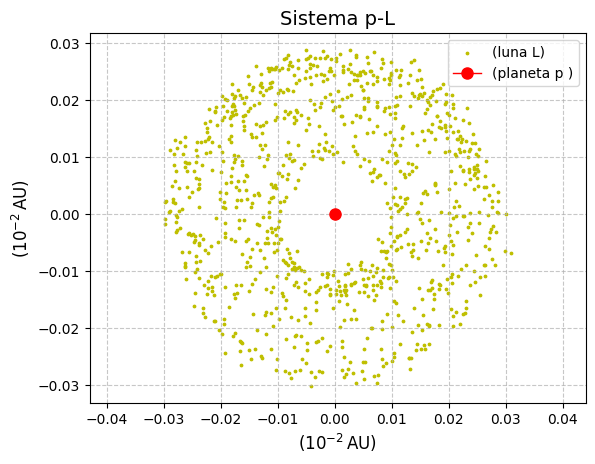

In [ ]:
#Definiendo los nuevos vectores relativos correspondientes a la luna
xs_L = rs[2, :, 0] - rs[3, :, 0]
ys_L = rs[2, :, 1] - rs[3, :, 1]


plt.scatter(xs_L, ys_L, marker='o',
            s = 3, label='(luna L)',
            color='y')

plt.plot(0,0, marker = 'o', markersize=8,
         label = '(planeta p )' ,color ='r',
         linestyle ='-',  linewidth = 1)

plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel(r'$(10^{-2} \, \mathrm{AU})$',
           fontsize=12)
plt.ylabel(r'$(10^{-2} \, \mathrm{AU})$',
           fontsize=12)

plt.title('Sistema p-L', fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.show()

##3. Hallando las cuadraturas del sistema en funcion del tiempo


Hallando el momentum lineal del sistema y verificando que es constante a través del tiempo


In [ ]:
##Empezamos por renombrar las matrices que se necesitan
r_e = rs[0]
r_s = rs[1]
r_p = rs[2]
r_L = rs[3]

v_e = vs[0]
v_s = vs[1]
v_p = vs[2]
v_L = vs[3]

In [ ]:
# Calculamos el momentum lineal para cada cuerpo
p_e = M_e * v_e
p_s = M_s * v_s
p_p = M_p * v_p
p_L = M_L * v_L

# Se suman los momentos en cada dirección (x, y, z)
px = np.sum([p_e[:, 0],
             p_s[:, 0],
             p_p[:, 0],
             p_L[:, 0]], axis=0)

py = np.sum([p_e[:, 1],
             p_s[:, 1],
             p_p[:, 1],
             p_L[:, 1]], axis=0)

pz = np.sum([p_e[:, 2],
             p_s[:, 2],
             p_p[:, 2],
             p_L[:, 2]], axis=0)

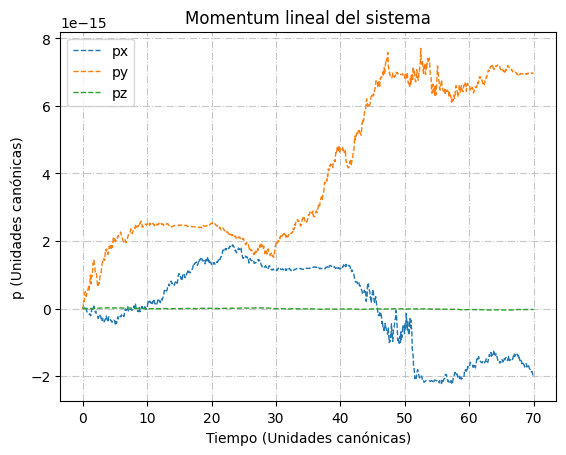

In [ ]:
#graficamos el momentum lineal respecto al tiempo
plt.plot(ts, px, label = 'px',
         linestyle ='--',  linewidth = 1)
plt.plot(ts, py, label = 'py',
         linestyle ='--',  linewidth = 1)
plt.plot(ts, pz, label = 'pz',
         linestyle ='--',  linewidth = 1)
plt.title('Momentum lineal del sistema')
plt.xlabel('Tiempo (Unidades canónicas)')
plt.ylabel('p (Unidades canónicas)')
plt.legend()
plt.grid(True, linestyle='-.', alpha=0.7)
plt.show()

In [ ]:
#verificamos el valor del momentum calculado y el teorico
p0 = np.array([px[0], py[0], pz[0]])
p0, cuadraturas['PCM']

(array([-5.42101086e-19, -1.84314369e-18,  2.71050543e-19]),
 array([-5.42101086e-19, -1.84314369e-18,  2.71050543e-19]))

En conclusión, para el momento inicial se cumplen los valores predichos por la rutina `ncuerpos_solucion`. Se observa, además, que los valores de $p_x$ y $p_y$ varían a lo largo del tiempo, lo cual podría deberse a errores computacionales inducidos durante los cálculos ya que se observa que las flutuaciones son del orden de $10^{-15}$.


Hallando ahora la distancia al centro de masa $\vec{R_{cm}}$ y verificando que es constante.

In [ ]:
Rx = np.zeros(len(ts))
Ry = np.zeros(len(ts))
Rz = np.zeros(len(ts))

# Constante de masas ponderadas
pos_masas = M_e * r_e + M_s * r_s + M_p * r_p + M_L * r_L
p_sobreM = np.array([px, py, pz]).T * ts[:, None] / M_epLs

# Cálculo para cada dimensión (x, y, z)
for i in range(3):
    R = (pos_masas[:, i] - p_sobreM[:, i]) / M_epLs
    if i == 0:
        Rx = R
    elif i == 1:
        Ry = R
    else:
        Rz = R

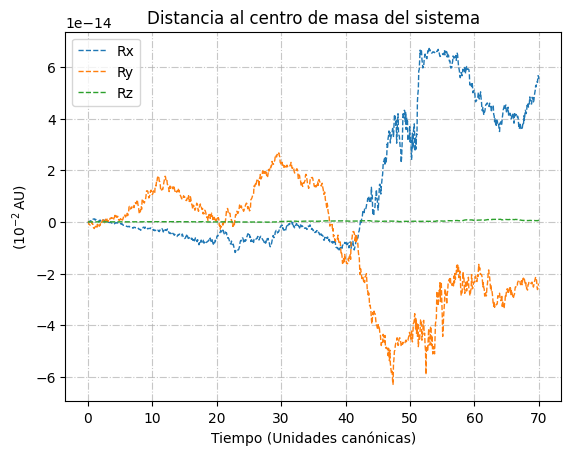

In [ ]:
#Ahora graficandolo como funcion del tiempo
plt.plot(ts, Rx, label = 'Rx',
         linestyle ='--',  linewidth = 1)
plt.plot(ts, Ry, label = 'Ry',
         linestyle ='--',  linewidth = 1)
plt.plot(ts, Rz, label = 'Rz',
         linestyle ='--',  linewidth = 1)

plt.title('Distancia al centro de masa del sistema')
plt.xlabel('Tiempo (Unidades canónicas)')
plt.ylabel(r'$(10^{-2} \, \mathrm{AU})$')
plt.legend()
plt.grid(True, linestyle='-.', alpha=0.7)
plt.show()

In [ ]:
# Obtener el valor teórico y calculado de R en t = 0
r_teorico = np.array(cuadraturas['RCM'][0])    # Valor teórico
r_calculado = np.array([Rx[0], Ry[0], Rz[0]])  # Valor calculado

r_calculado, r_teorico

(array([5.45330014e-18, 6.28564595e-17, 0.00000000e+00]),
 array([5.45330014e-18, 6.28564595e-17, 0.00000000e+00]))

Al igual que con el momentum lineal, el valor inicial del vector $\vec{R_{cm}}$ es igual al predicho por la rutina `ncuerpos_solucion`, luego empieza a desviarse un poco.

Hallando ahora el momentum angular $\vec{L}$ del sistema y verificando que es constante.

In [ ]:
# Inicialización de Lx, Ly, y Lz
Lx = np.zeros(len(ts))
Ly = np.zeros(len(ts))
Lz = np.zeros(len(ts))

# Hallando el momento angular total
L = (
    np.cross(r_e, p_e) +
    np.cross(r_s, p_s) +
    np.cross(r_p, p_p) +
    np.cross(r_L, p_L)
)

# Separar las componentes x, y, z del momento angular
Lx, Ly, Lz = L[:, 0], L[:, 1], L[:, 2]

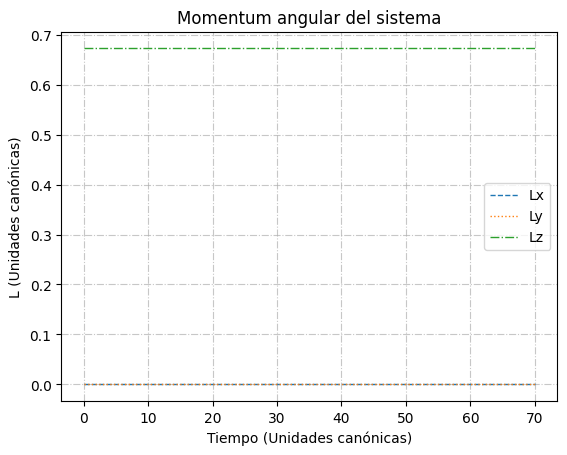

In [ ]:
#graficando el momentun angular del sistema
plt.plot(ts, Lx, label = 'Lx',
         linestyle ='--',  linewidth = 1)
plt.plot(ts, Ly, label = 'Ly',
         linestyle =':',  linewidth = 1)
plt.plot(ts, Lz, label = 'Lz',
         linestyle ='-.',  linewidth = 1)
plt.title('Momentum angular del sistema')
plt.xlabel('Tiempo (Unidades canónicas)')
plt.ylabel('L (Unidades canónicas)')
plt.legend()
plt.grid(True, linestyle='-.', alpha=0.7)
plt.show()

In [ ]:
#comparando el valor teorico y el calculado
L0 = np.array([Lx[0], Ly[0], Lz[0]])
L0, cuadraturas['L']

(array([ 8.61056751e-04, -2.72727273e-06,  6.72509416e-01]),
 array([ 8.61056751e-04, -2.72727273e-06,  6.72509416e-01]))

Se observa que el momento angular total del sistema permanece constante a lo largo del tiempo, siendo su magnitud dominada principalmente por la componente ${L_{z}}$del vector de momento angular.

Por ultimo se encuentra el valor de energía del sistema y se verifica que sea constante

In [ ]:
# Calculamos la energía cinética total
K = 0.5 * (
    M_e * np.linalg.norm(v_e, axis=1)**2 +
    M_L * np.linalg.norm(v_L, axis=1)**2 +
    M_p * np.linalg.norm(v_p, axis=1)**2 +
    M_s * np.linalg.norm(v_s, axis=1)**2
)

# Calculando la energia potencial
N = len(ts)
U = np.zeros(N)
Ms = np.array([M_e, M_s, M_p, M_L])

for t in range(N):
    Rs = np.array([r_e[t], r_s[t], r_p[t], r_L[t]])
    U_t = 0.0

    for i in range(len(Ms)):
        for j in range(i + 1, len(Ms)):
            rij = np.linalg.norm(Rs[i] - Rs[j])
            U_t += -Ms[i] * Ms[j] / rij

    U[t] = U_t

# Calcular la energía total
E = K + U

print("Primeros 10 valores calculados:\n", E[0:10])
print("\nValor teorico", cuadraturas['E'])

Primeros 10 valores calculados:
 [-0.06155395 -0.06155395 -0.06155395 -0.06155395 -0.06155395 -0.06155395
 -0.06155395 -0.06155395 -0.06155395 -0.06155395]

Valor teorico -0.06155394760485805


Como se puede observar, la energia encontrada para cada instante de tiempo es igual, por lo que se cumple la décima y última cuadratura. Ademas el valor teorico y el encontrado son iguales

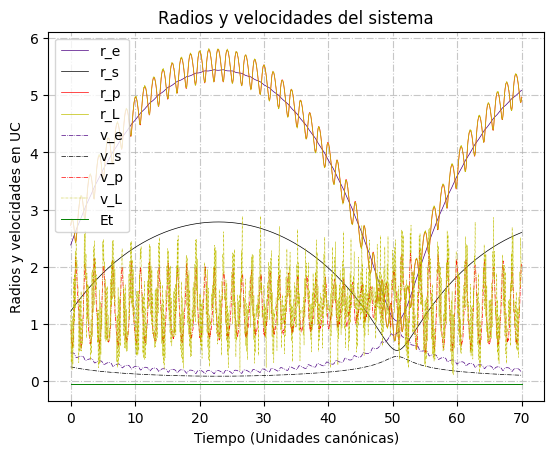

In [ ]:
#realizando la grafica de radios y velocidades en el tiempo
plt.plot(ts, np.linalg.norm(r_e, axis=1), label = 'r_e',
         linestyle ='-',  linewidth = 0.5, color = 'indigo')
plt.plot(ts, np.linalg.norm(r_s, axis=1), label = 'r_s',
         linestyle ='-',  linewidth = 0.5, color = 'k')
plt.plot(ts, np.linalg.norm(r_p, axis=1), label = 'r_p',
         linestyle ='-',  linewidth = 0.5, color = 'r')
plt.plot(ts, np.linalg.norm(r_L, axis=1), label = 'r_L',
         linestyle ='-',  linewidth = 0.5, color = 'y')
plt.plot(ts,np.linalg.norm(v_e, axis = 1), label = 'v_e',
         linestyle ='-.',  linewidth = 0.5, color = 'indigo')
plt.plot(ts,np.linalg.norm(v_s, axis = 1), label = 'v_s',
         linestyle ='-.',  linewidth = 0.5, color = 'k')
plt.plot(ts,np.linalg.norm(v_p, axis = 1), label = 'v_p',
         linestyle ='-.',  linewidth = 0.5, color = 'r')
plt.plot(ts,np.linalg.norm(v_L, axis = 1), label = 'v_L',
         linestyle ='-.',  linewidth = 0.3, color = 'y')
plt.plot(ts, E, label = 'Et',
         linestyle ='-',  linewidth = 0.7, color = 'green')
plt.title('Radios y velocidades del sistema')
plt.xlabel('Tiempo (Unidades canónicas)')
plt.ylabel('Radios y velocidades en UC')
plt.legend(loc ='best')
plt.grid(True, linestyle='-.', alpha=0.7)
plt.show()


##4.Verificando que el sistema está virializado

In [ ]:
#Definiendo las cotas
Gv = np.zeros(len(ts))
for i in range(len(ts)):
  G_e = M_e *np.dot(r_e[i], v_e[i])
  G_s = M_s *np.dot(r_s[i], v_s[i])
  G_p = M_p *np.dot(r_p[i], v_p[i])
  G_L = M_L *np.dot(r_L[i], v_L[i])
  Gs = G_e + G_s + G_p + G_L
  Gv[i] = Gs

#Hallando los valores minimos y maximos
Gmin = min(Gv)
Gmax = max(Gv)

ymin =  np.ones(len(ts)) * Gmin
ymax =  np.ones(len(ts)) * Gmax

#Hallando el promedio de energias
U_prom = np.mean(U)
K_prom = np.mean(K)

#encontrando si esta virializado
virial = 2*K_prom + U_prom

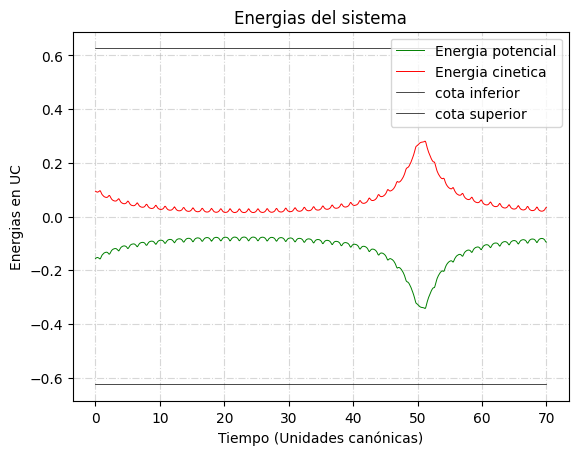

In [ ]:
#graficando la energia a lo largo del tiempo
plt.plot(ts, U, label = 'Energia potencial',
         linestyle ='-',  linewidth = 0.7, color = 'green')
plt.plot(ts, K, label = 'Energia cinetica',
         linestyle ='-',  linewidth = 0.7, color = 'red')
plt.plot(ts, ymin, label = 'cota inferior',
         linestyle ='-',  linewidth =0.5, color = 'black')
plt.plot(ts, ymax, label = 'cota superior',
         linestyle ='-',  linewidth =0.5, color = 'black')
plt.title('Energias del sistema')
plt.xlabel('Tiempo (Unidades canónicas)')
plt.ylabel('Energias en UC')
plt.legend(loc ='best')
plt.grid(True, linestyle='-.', alpha=0.5)
plt.show()

In [ ]:
#Haciendo la comparacion con los valores entregados por la rutina ncuerpos
Ut =np.array(cuadraturas['U'])
Kt =np.array(cuadraturas['K'])

#se utilizan los promedios
Utp = np.mean(Ut)
Ktp = np.mean(Kt)

#valor teórico (ncuerpos_solucion)
virial_teo = 2*Ktp + Utp

print(f'el valor de 2<K> +<U> teorico es es:\n{virial_teo:.6f}')
print(f'el valor de 2<K> +<U> calculado es:\n{virial:.6f}')

el valor de 2<K> +<U> teorico es es:
-0.003312
el valor de 2<K> +<U> calculado es:
-0.003312


Analizando las cotas encontradas para el valor de $G$ y el valor encontrado para $\dot{G}$ se puede afirmar que el sistema cumple el teorema del virial.

##5. Estudiando el sistema por pares y solucionandolo con la rutina `doscuerpos_solucion`, además comparando los resultados con el punto 2.

In [ ]:
#vectores relativos sistema s--epL
r_4, v_4 = pc.doscuerpos_solucion(
    M_epLs, r_epLs, v_epLs, ts)

#vectores relativos en el sistema e--pL
r_3, v_3 = pc.doscuerpos_solucion(
    M_epL, r_epL, v_epL, ts)

#vectores relativos en el sistema p--L
r_2, v_2 = pc.doscuerpos_solucion(
    M_pL, r_pL, v_pL, ts)

In [ ]:
#Definiendo una funcion que encuentra los vectores respecto al baricentro
def vector(R, V, m1, m2, r, v):
  r1 = R + (m2/(m1+m2))*r
  v1 = V + (m2/(m1+m2))*v
  r2 = R - (m1/(m1+m2))*r
  v2 = V - (m1/(m1+m2))*v

  return r1, v1, r2, v2

#Primero para el sistema s--epL
r_sts, v_sts, R_epLts, V_epLts = vector(
    R_cm, V_cm, M_s, M_epL, r_4, v_4)

#Ahora para el sistema e--pL
r_ets, v_ets, R_pLts, V_pLts = vector(
    R_epLts, V_epLts, M_e, M_pL, r_3, v_3)

#Por ultimo para el sistema p--L
r_pts, v_pts, r_Lts, v_Lts = vector(
    R_pLts, V_pLts, M_p, M_L, r_2, v_2)

La mejor forma de comparar los resultados, es graficando nuevamente el sistema pero esta vez usando los vectores encontrados a partir de la solución por dos cuerpos y analizando la gráfica encontrada.

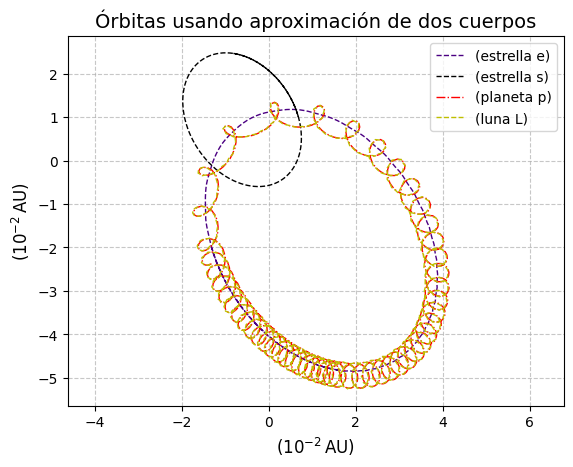

In [ ]:
#haciendo la grafica con los nuevos vectores
plt.plot(r_ets[:, 0], r_ets[:, 1],
         label ='(estrella e)', color ='indigo',
         linestyle ='--', linewidth = 1)

plt.plot(r_sts[:, 0], r_sts[:, 1],
         label ='(estrella s)', color ='k',
         linestyle ='--', linewidth = 1)

plt.plot(r_pts[:, 0], r_pts[:, 1],
         label ='(planeta p)', color ='r',
         linestyle ='-.', linewidth = 1)

plt.plot(r_Lts[:, 0], r_Lts[:, 1],
         label ='(luna L)', color ='y',
         linestyle ='--',  linewidth = 1)

plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel(r'$(10^{-2} \, \mathrm{AU})$',
           fontsize=12)
plt.ylabel(r'$(10^{-2} \, \mathrm{AU})$',
           fontsize=12)
plt.title('Órbitas usando aproximación de dos cuerpos', fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.show()

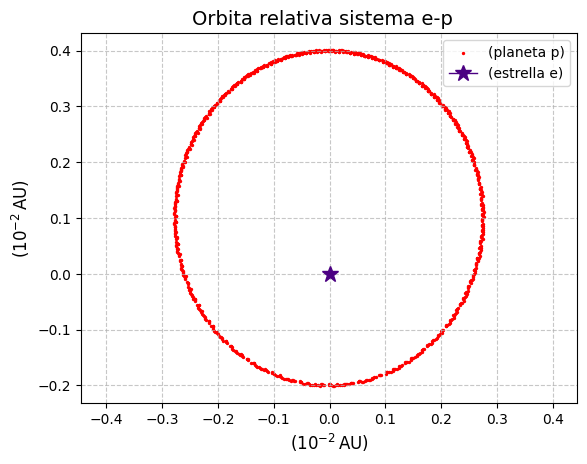

In [ ]:
#definiendo las posiciones relativas del planeta
xs_pts = r_ets[:,0] - r_pts[:,0]
ys_pts = r_ets[:,1] - r_pts[:,1]

#graficando el sistema con los vectores hallados
plt.scatter(xs_pts, ys_pts, marker='o',
            s = 2, label='(planeta p)',
            color='r')

plt.plot(0,0, marker = '*', markersize=12,
         label = '(estrella e)' ,color ='indigo',
         linestyle ='-',  linewidth = 1)

plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel(r'$(10^{-2} \, \mathrm{AU})$',
           fontsize=12)
plt.ylabel(r'$(10^{-2} \, \mathrm{AU})$',
           fontsize=12)
plt.title('Orbita relativa sistema e-p  ', fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.show()

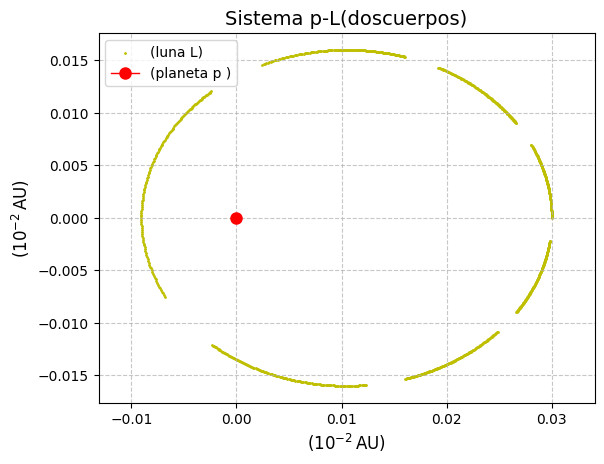

In [ ]:
#definiendo las posiciones relativas del planeta
xs_Lts = r_pts[:,0] - r_Lts[:,0]
ys_Lts = r_pts[:,1] - r_Lts[:,1]

#graficando el sistema p--L
plt.scatter(xs_Lts, ys_Lts, marker='o',
            s = 1, label='(luna L)',
            color='y')

plt.plot(0,0, marker = 'o', markersize=8,
         label = '(planeta p )' ,color ='r',
         linestyle ='-',  linewidth = 1)

plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel(r'$(10^{-2} \, \mathrm{AU})$',
           fontsize=12)
plt.ylabel(r'$(10^{-2} \, \mathrm{AU})$',
           fontsize=12)

plt.title('Sistema p-L(doscuerpos)', fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.show()


Las gráficas obtenidas muestran una alta similitud con las del punto 2, especialmente la primera, que representa el sistema de cuatro partículas. Esto sugiere que los vectores generados por ambas rutinas de `pymcel` son consistentes.

Para las otras dos gráficas, que describen los sistemas por pares (e-p y p-L), la rutina `doscuerpos_solucion` proporciona una aproximación más precisa. Esto indica que, al usar una aproximación por pares, el sistema reproduce un comportamiento jerárquico que refleja con fidelidad el sistema de cuatro cuerpos.


##6. Calculando las 10 cuadraturas y verificando si el sistema bajo aproximación jerárquica está virializado.


In [ ]:
#Hallando primeramente el vector de momentum lineal
p_ets = M_e * v_ets
p_sts = M_s * v_sts
p_pts = M_p * v_pts
p_Lts = M_L * v_Lts

# Sumar los momentos en cada dirección (x, y, z)
pxs = np.sum([p_ets[:, 0],
             p_sts[:, 0],
             p_pts[:, 0],
             p_Lts[:, 0]], axis=0)

pys = np.sum([p_ets[:, 1],
             p_sts[:, 1],
             p_pts[:, 1],
             p_Lts[:, 1]], axis=0)

pzs = np.sum([p_ets[:, 2],
             p_sts[:, 2],
             p_pts[:, 2],
             p_Lts[:, 2]], axis=0)

#verificamos el valor del momentum calculado y el teorico
p0ts = np.array([pxs[0], pys[0], pzs[0]])
print('Valor calculado con la aproximacion jerarquica de Pcm:\n', p0ts)
print('Valor teorico Pcm:\n', cuadraturas['PCM'])

Valor calculado con la aproximacion jerarquica de Pcm:
 [-5.42101086e-19 -1.84314369e-18  2.71050543e-19]
Valor teorico Pcm:
 [-5.42101086e-19 -1.84314369e-18  2.71050543e-19]


Primera cuadratura, el vector de momentum lineal coincide con el valor teórico, eso quiere decir que se cumplen las 3 primeras cuadraturas con la aproximación jerárquica

In [ ]:
#Ahora la posición del centro de masa Rcm
Rxts = np.zeros(len(ts))
Ryts = np.zeros(len(ts))
Rzts = np.zeros(len(ts))

# Constante de masas ponderadas
pos_masas = M_e * r_ets + M_s * r_sts + M_p * r_pts + M_L * r_Lts
p_sobreM = np.array([pxs, pys, pzs]).T * ts[:, None] / M_epLs

# Cálculo para cada dimensión (x, y, z)
for i in range(3):
    R = (pos_masas[:, i] - p_sobreM[:, i]) / M_epLs
    if i == 0:
        Rxts = R
    elif i == 1:
        Ryts = R
    else:
        Rzts = R

# verificación del valor teórico
r_calculado0 = np.array([Rxts[0], Ryts[0], Rzts[0]])  # Valor calculado

print('Valor calculado con la aproximacion jerarquica de Rcm:\n', r_calculado0)
print('Valor teorico Rcm:\n', cuadraturas['RCM'][0])

Valor calculado con la aproximacion jerarquica de Rcm:
 [5.45330014e-18 6.28564595e-17 0.00000000e+00]
Valor teorico Rcm:
 [5.45330014e-18 6.28564595e-17 0.00000000e+00]


La cuadratura del centro de masa del sistema también se cumple para el instante cero, esto da como resultado seis cuadraturas.

In [ ]:
#Ahora el momentum angular del sistema

Lxts = np.zeros(len(ts))
Lyts = np.zeros(len(ts))
Lzts = np.zeros(len(ts))

# Hallando el momento angular total
Lts = (
    np.cross(r_ets, p_ets) +
    np.cross(r_sts, p_sts) +
    np.cross(r_pts, p_pts) +
    np.cross(r_Lts, p_Lts)
)

# Separar las componentes x, y, z del momento angular
Lxts, Lyts, Lzts = Lts[:, 0], Lts[:, 1], Lts[:, 2]

#comparando el valor teorico y el calculado
L0ts = np.array([Lxts[0], Lyts[0], Lzts[0]])

print('Valor calculado con la aproximacion jerarquica de L:\n', L0ts)
print('Valor teorico L:\n', cuadraturas['L'])

Valor calculado con la aproximacion jerarquica de L:
 [ 8.61056751e-04 -2.72727273e-06  6.72509416e-01]
Valor teorico L:
 [ 8.61056751e-04 -2.72727273e-06  6.72509416e-01]


Se cumplen las tres cuadraturas de momento angular, alcanzando así un total de nueve cuadraturas. Solo resta comprobar que también se satisface la cuadratura correspondiente a la energía.

In [ ]:
# Calculamos la energía cinética total
K0 = 0.5 * (
    M_e * np.linalg.norm(v_ets, axis=1)**2 +
    M_L * np.linalg.norm(v_Lts, axis=1)**2 +
    M_p * np.linalg.norm(v_pts, axis=1)**2 +
    M_s * np.linalg.norm(v_sts, axis=1)**2
)

# Calculando la energía potencial
N = len(ts)
U = np.zeros(N)
Ms = np.array([M_e, M_s, M_p, M_L])

for t in range(N):
    Rs = np.array([r_ets[t], r_sts[t], r_pts[t], r_Lts[t]])
    U_t = 0.0

    for i in range(len(Ms)):
        for j in range(i + 1, len(Ms)):
            rij = np.linalg.norm(Rs[i] - Rs[j])
            U_t += -Ms[i] * Ms[j] / rij

    U[t] = U_t

# Calcular la energía total
E0 = K0 + U

print("Valor calculado de energia:\n", E0[0])
print("Valor teorico\n", cuadraturas['E'])

Valor calculado de energia:
 -0.06155394760485802
Valor teorico
 -0.06155394760485805


Se observa que la última cuadratura también se cumple, lo cual indica que cualquiera de los dos métodos empleados para resolver el sistema es igualmente efectivo, respaldando así la concordancia con la teoría.

Por ultimo se demuestra que el sistema esta virializado

In [ ]:
#Definiendo las cotas
Gv0 = np.zeros(len(ts))
for i in range(len(ts)):
  G_e = M_e *np.dot(r_ets[i], v_ets[i])
  G_s = M_s *np.dot(r_sts[i], v_sts[i])
  G_p = M_p *np.dot(r_pts[i], v_pts[i])
  G_L = M_L *np.dot(r_Lts[i], v_Lts[i])
  Gs = G_e + G_s + G_p + G_L
  Gv0[i] = Gs

#Hallando los valores minimos y maximos de G
Gmin0 = min(Gv0)
Gmax0 = max(Gv0)

ymin0 =  np.ones(len(ts)) * Gmin0
ymax0 =  np.ones(len(ts)) * Gmax0

#Hallando el promedio de energias
U_prom0 = np.mean(U)
K_prom0 = np.mean(K)

#encontrando si esta virializado
virial0 = 2*K_prom0 + U_prom0

#comparando con el valor teorico
print(f'el valor de 2<K> +<U> teorico es es:\n{virial_teo:.6f}')
print(f'el valor de 2<K> +<U> calculado es:\n{virial0:.6f}')

el valor de 2<K> +<U> teorico es es:
-0.003312
el valor de 2<K> +<U> calculado es:
-0.003303


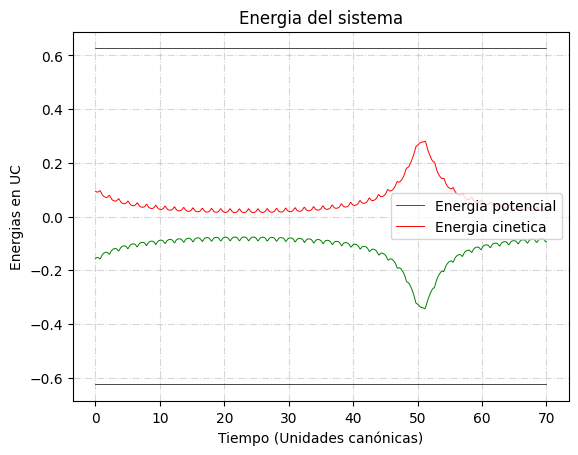

In [ ]:
#Graficando la energia y las cotas en funcion del tiempo
plt.plot(ts, U, label = 'Energia potencial',
         linestyle ='-',  linewidth = 0.7, color = 'green')
plt.plot(ts, K, label = 'Energia cinetica',
         linestyle ='-',  linewidth = 0.7, color = 'red')
plt.plot(ts, ymin0, linestyle ='-',
         linewidth =0.5, color = 'black')
plt.plot(ts, ymax0, linestyle ='-',
         linewidth =0.5, color = 'black')

plt.title('Energia del sistema')
plt.xlabel('Tiempo (Unidades canónicas)')
plt.ylabel('Energias en UC')
plt.legend(loc ='best')
plt.grid(True, linestyle='-.', alpha=0.5)
plt.show()

Conclusion:
El sistema analizado mediante pares jerárquicos también presenta un estado virializado. Esto se puede observar a través de su acotamiento y el cumplimiento de la identidad de Lagrange-Jacobi, lo que resulta en que $\dot{G}$ sea aproximadamente igual al valor teórico. Por lo tanto, se concluye que el sistema es virializado y está ligado, lo que da lugar a órbitas elípticas.
